Name- Akarsh Singh

Roll- 59

Panel- D             Batch-D2

Subject- DEC

Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math


In [2]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [3]:
df = pd.read_csv("headbrain.csv")

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [6]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [7]:
df.shape

(237, 4)

In [8]:
lr = LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split

X = df['Head Size(cm^3)'].values.reshape(-1,1)
Y = df['Brain Weight(grams)'].values.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [14]:
calculate_rmse(y_test, y_pred)

67.02695078393506

In [15]:
def evaluate_regression_algorithm(model, X_train, y_train):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    rmse_train = calculate_rmse(y_train, y_pred_train)
    return rmse_train

In [16]:
rmse_train = evaluate_regression_algorithm(lr, X_train, y_train)
print(f"Root Mean Squared Error on Training Data: {rmse_train}")

Root Mean Squared Error on Training Data: 73.3917686661835


In [17]:
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

In [18]:
selected_column = df['Head Size(cm^3)']
mean_value = calculate_mean(selected_column)
print(f"Mean Value: {mean_value}")

Mean Value: 3633.9915611814345


In [19]:
selected_column = df['Brain Weight(grams)']
mean_value = calculate_mean(selected_column)
print(f"Mean Value: {mean_value}")

Mean Value: 1282.873417721519


In [20]:
def calculate_variance(numbers):
    mean = calculate_mean(numbers)
    variance = sum((x - mean) ** 2 for x in numbers) / len(numbers)
    return variance

In [21]:
selected_column = df['Head Size(cm^3)']

variance_value = calculate_variance(selected_column)
print(f"Variance Value: {variance_value}")

Variance Value: 132852.97039292127


In [22]:
selected_column = df['Brain Weight(grams)']

variance_value = calculate_variance(selected_column)
print(f"Variance Value: {variance_value}")

Variance Value: 14420.718154141974


In [23]:
def calculate_covariance(X, Y):
    n = len(X)
    mean_X, mean_Y = calculate_mean(X), calculate_mean(Y)
    covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / n
    return covariance

In [24]:
covariance_value = calculate_covariance(X, Y)
print(f"Covariance Value: {covariance_value}")

Covariance Value: [34997.37023981]


In [25]:
def calculate_coefficients(X, Y):
    mean_X, mean_Y = calculate_mean(X), calculate_mean(Y)
    B1 = calculate_covariance(X, Y) / calculate_variance(X)
    B0 = mean_Y - B1 * mean_X
    return B0, B1

In [26]:
cc = calculate_coefficients(X, Y)
print(f"Coefficient Value: {cc}")

Coefficient Value: (array([325.57342105]), array([0.26342934]))


In [27]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [28]:
np.corrcoef(X, Y)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

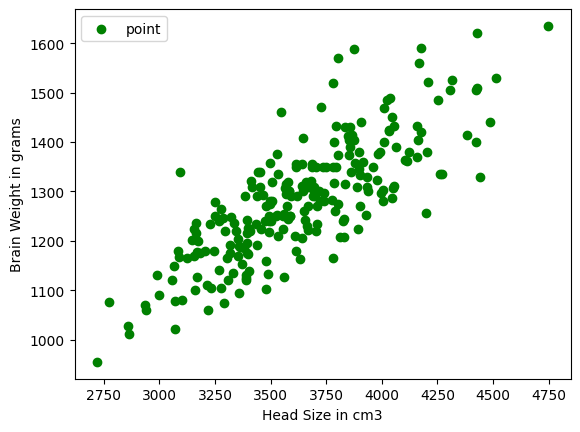

In [29]:
plt.scatter(X, Y, c='green', label='point')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [30]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)


print("Mean of X: ",mean_x)
print("Mean of Y: ", mean_y)
print("coefficients for regression",b1, b0)

Mean of X:  3633.9915611814345
Mean of Y:  1282.873417721519
coefficients for regression 0.26342933948939945 325.57342104944223


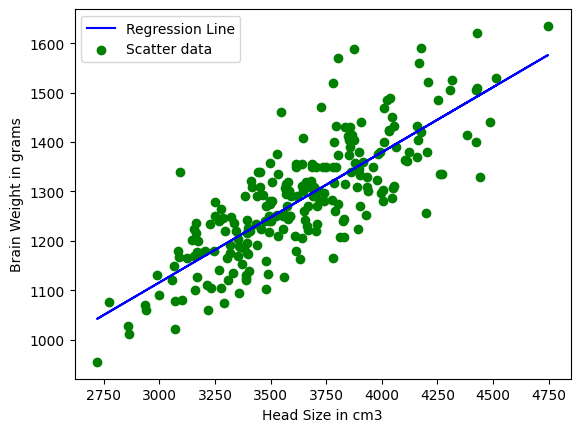

In [31]:
%matplotlib inline

y = b0 + b1 * X

plt.plot(X, y, color='blue', label='Regression Line')

plt.scatter(X, Y, c='green', label='Scatter data')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [32]:
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is",rmse)

Root Mean Square Error is 72.1206213783709


In [33]:
X = np.array(X).reshape(-1 ,1)
y = np.array(Y).reshape(-1 ,1)

In [34]:
mse = mean_squared_error(X,y)
print("Mean Squared Error:\t" , math.sqrt(mse))

Mean Squared Error:	 2367.495611943946


In [35]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()

rsme = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(rsme)

Root Mean Square Error:

133.56424548331913


In [36]:
def visualize_test_results(X_test, y_test, B0, B1):
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, B0 + B1 * X_test, color='orange', label='Regression Line')
    plt.title('Test Data and Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

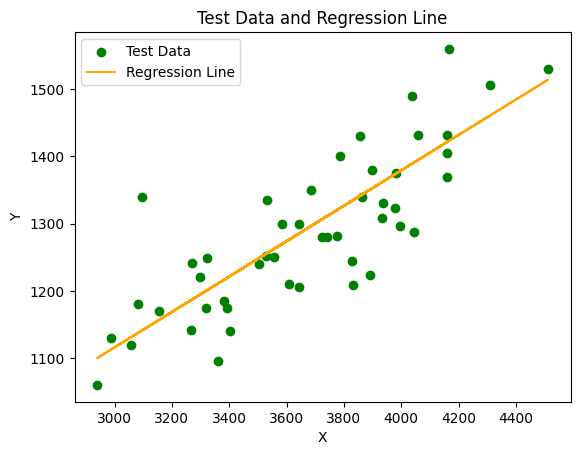

In [37]:
visualize_test_results(X_test, y_test, b0, b1)

In [40]:
def visualize_training_results(X_train, y_train, B0, B1):
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_train, B0 + B1 * X_train, color='red', label='Regression Line')
    plt.title('Training Data and Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


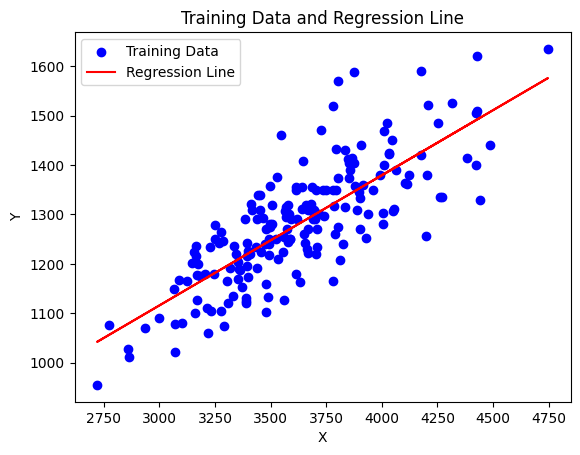

In [39]:
visualize_training_results(X_train, y_train, b0, b1)